In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
customer_data = pd.read_csv("Mall_Customers.csv")
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
customer_data.iloc[1 : 3].values #Time pasa

array([[2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6]], dtype=object)

In [17]:
xX = customer_data.iloc[ : , [3,4]].values

WCSS :- Within cluser sum squares

In [18]:
#finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
    kmeans.fit(xX)
    wcss.append(kmeans.inertia_)

In [19]:
print(wcss)

[269981.28, 183653.32894736837, 106348.37306211118, 73880.64496247197, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518779, 24766.47160979344, 23103.122085983916]


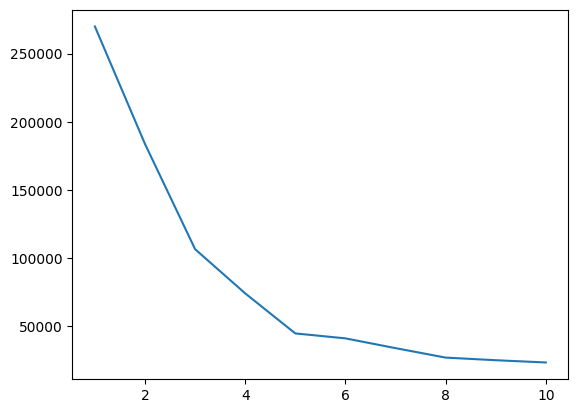

In [20]:
plt.plot(range(1,11) , wcss)

In [51]:
# Optimum number of Cluster is 5 ;- Training Kmean Cluster model
kmeans = KMeans(n_clusters=5 , init="k-means++" , random_state=0)

#return a label for each data point based on their cluster
#
y = kmeans.fit_predict(xX) 
customer_data["cluster"] = y 

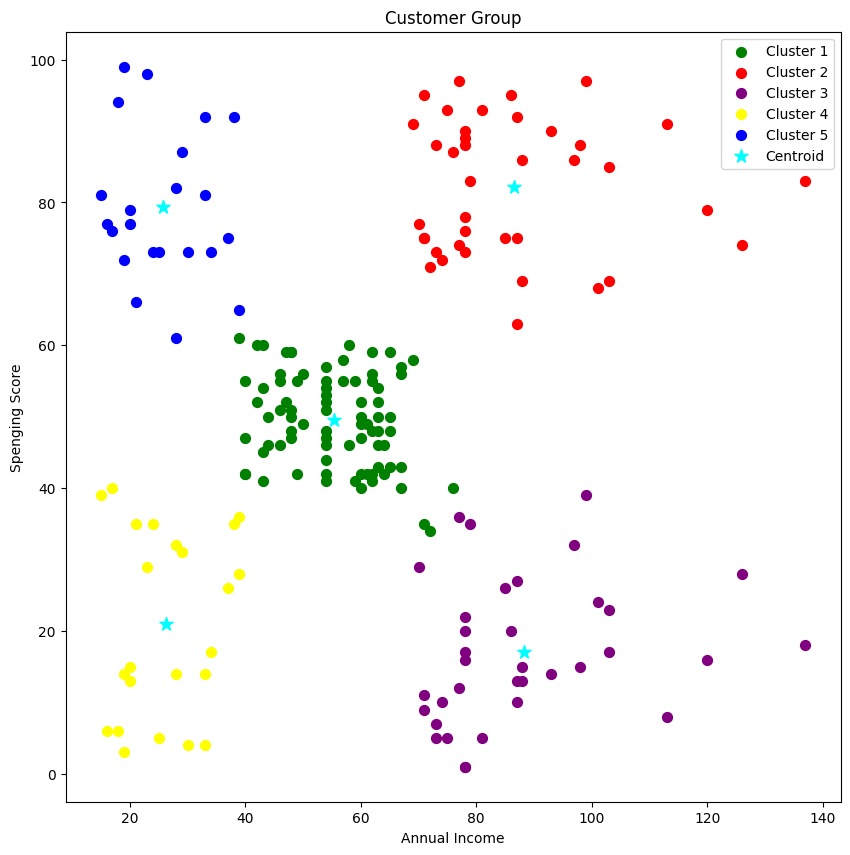

In [49]:
plt.figure(figsize=(10,10))

plt.scatter(xX[y== 0 , 0] , xX[y==0,1] , s=50,c="green",label="Cluster 1")
plt.scatter(xX[y== 1 , 0] , xX[y==1,1] , s=50,c="red",label="Cluster 2")
plt.scatter(xX[y== 2 , 0] , xX[y==2,1] , s=50,c="purple",label="Cluster 3")
plt.scatter(xX[y== 3 , 0] , xX[y==3,1] , s=50,c="yellow",label="Cluster 4")
plt.scatter(xX[y== 4 , 0] , xX[y==4,1] , s=50,c="blue",label="Cluster 5")
plt.title("Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spenging Score")
plt.scatter(kmeans.cluster_centers_[ : , 0] , kmeans.cluster_centers_[: , 1] , s= 100 , marker = "*" , color = "cyan" , label="Centroid")
plt.legend()
plt.show()



In [52]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [56]:
print("People in Cluster 0:")
print(customer_data[customer_data.cluster == 0]["CustomerID"].tolist())

People in Cluster 0:
[44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 127, 133, 143]
